In [1]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.1

In [3]:
import numpy as np
import pandas as pd

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/coloring_mnist2

/content/drive/MyDrive/Colab Notebooks/coloring_mnist2


In [7]:
from pathlib import Path

In [8]:
path = Path("/content/drive/MyDrive/Colab Notebooks/coloring_mnist2")

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
!pip install keras_preprocessing==1.0.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.3 MB/s eta 0:00:00


In [11]:
import tensorflow as tf

In [12]:
import keras
from tensorflow.keras.utils import img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
import cv2
from tensorflow.keras.callbacks import EarlyStopping
import glob

In [13]:
!pip install split-folders

In [15]:
import splitfolders

input_dir = "/content/drive/MyDrive/Colab Notebooks/coloring_mnist2"
output_dir =  "/content/drive/MyDrive/Colab Notebooks/output"

splitfolders.ratio(input_dir, output=output_dir,seed=1337, ratio=(.9, 0.1))

Выходные данные были обрезаны до нескольких последних строк (5000).
Copying files: 16866 files [1:05:21,  3.46 files/s]
Copying files: 16867 files [1:05:21,  3.79 files/s]
Copying files: 16868 files [1:05:21,  4.15 files/s]
Copying files: 16869 files [1:05:21,  4.32 files/s]
Copying files: 16870 files [1:05:22,  3.86 files/s]
Copying files: 16871 files [1:05:22,  3.99 files/s]
Copying files: 16872 files [1:05:22,  4.41 files/s]
Copying files: 16873 files [1:05:22,  3.84 files/s]
Copying files: 16874 files [1:05:23,  3.93 files/s]
Copying files: 16875 files [1:05:23,  4.35 files/s]
Copying files: 16876 files [1:05:23,  4.40 files/s]
Copying files: 16877 files [1:05:23,  4.27 files/s]
Copying files: 16878 files [1:05:23,  4.51 files/s]
Copying files: 16879 files [1:05:24,  3.56 files/s]
Copying files: 16880 files [1:05:24,  3.96 files/s]
Copying files: 16881 files [1:05:24,  4.22 files/s]
Copying files: 16882 files [1:05:24,  4.53 files/s]
Copying files: 16883 files [1:05:25,  4.53 files

In [18]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/output/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/output/val"
test_dir = "/content/drive/MyDrive/Colab Notebooks/output/test"

image_size = (31, 31, 1)
# number of epochs to train top model
epochs = 50 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 100

labels = os.listdir(train_dir)


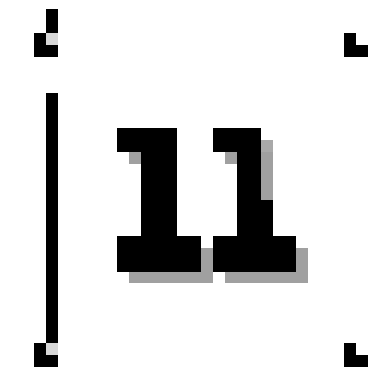

In [19]:
image_name = train_dir +"/11/sub_1732630928000_03_27.png" #Image to be used as query
def plotLisa(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (31,31))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotLisa(image_name)

In [20]:
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2
                                    )

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
training_set =  train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=image_size[:2],
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='grayscale'

)

val_set =  test_datagen.flow_from_directory(
                                                    val_dir,
                                                    target_size=image_size[:2],
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='grayscale'

)

Found 23802 images belonging to 34 classes.
Found 3305 images belonging to 34 classes.


In [22]:
labels = training_set.class_indices
labels = {v: k for k, v in labels.items()}

In [23]:
print(labels)

{0: '-1', 1: '.ipynb_checkpoints', 2: '01', 3: '02', 4: '03', 5: '04', 6: '05', 7: '06', 8: '07', 9: '08', 10: '09', 11: '10', 12: '11', 13: '12', 14: '13', 15: '14', 16: '15', 17: '16', 18: '17', 19: '18', 20: '19', 21: '20', 22: '21', 23: '22', 24: '23', 25: '24', 26: '25', 27: '26', 28: '27', 29: '28', 30: '29', 31: '30', 32: '31', 33: '32'}


In [24]:
for data_batch, labels_batch in training_set:
    print(data_batch.shape)
    break

(100, 31, 31, 1)


In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=image_size, activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [27]:
checkpoint_filepath = "/content/drive/MyDrive/Colab Notebooks/mmmnist_model/model2025-01.h5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=5, monitor="val_accuracy", mode="max"),
             model_checkpoint_callback,
]

In [28]:
history = model.fit_generator(  training_set,
                                epochs=epochs,
                                validation_data=val_set,
                                callbacks = callbacks
)

<ipython-input-28-6c0cb64ed3f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(  training_set,


Epoch 1/50
239/239 [==============================] - ETA: 0s - loss: 2.9645 - accuracy: 0.1299

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


239/239 [==============================] - 505s 2s/step - loss: 2.9645 - accuracy: 0.1299 - val_loss: 2.0396 - val_accuracy: 0.3794
Epoch 2/50
239/239 [==============================] - 222s 928ms/step - loss: 1.4093 - accuracy: 0.5158 - val_loss: 1.1598 - val_accuracy: 0.6387
Epoch 3/50
239/239 [==============================] - 216s 904ms/step - loss: 0.7525 - accuracy: 0.7417 - val_loss: 0.3512 - val_accuracy: 0.8675
Epoch 4/50
239/239 [==============================] - 215s 896ms/step - loss: 0.4552 - accuracy: 0.8533 - val_loss: 0.4253 - val_accuracy: 0.8454
Epoch 5/50
239/239 [==============================] - 224s 938ms/step - loss: 0.4055 - accuracy: 0.8760 - val_loss: 0.0997 - val_accuracy: 0.9731
Epoch 6/50
239/239 [==============================] - 215s 894ms/step - loss: 0.2559 - accuracy: 0.9231 - val_loss: 0.0943 - val_accuracy: 0.9776
Epoch 7/50
239/239 [==============================] - 214s 896ms/step - loss: 0.1769 - accuracy: 0.9486 - val_loss: 0.0725 - val_accuracy:

In [29]:
model.save('/content/drive/MyDrive/Colab Notebooks/mmmnist_model/model_2025_final.h5')

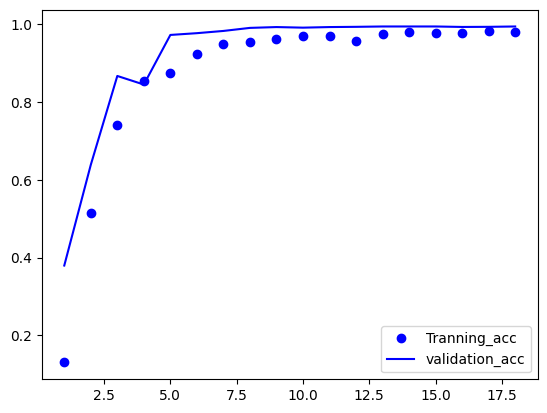

In [30]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Tranning_acc")
plt.plot(epochs, val_acc, "b", label="validation_acc")
plt.legend()

In [31]:
saved_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/mmmnist_model/model_2025_final.h5')

In [ ]:
def predict(img):
    img_array = img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = saved_model.predict(img_batch)
    print(np.argmax(prediction, axis=1))
    prediction = labels[np.argmax(prediction)]
    return prediction

In [32]:
def predict_proba(img, k=3):
    img_array = img_to_array(img)
    img_array = cv2.resize(img, image_size[:2])  # Изменение размера
    img_array = np.expand_dims(img_array, axis=-1)  # Добавление канала (для grayscale)
    img_array = np.expand_dims(img_array, axis=0)  # Добавление измерения для batch
    img_array = img_array / 255.0  # Масштабирование


    probabilities = saved_model.predict(img_array)[0]
    top_k_indices = np.argsort(probabilities)[-k:][::-1]
    top_k = [(labels[i], probabilities[i]) for i in top_k_indices]
    return top_k

In [35]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/output/train/27/sub_1732631066000_13_02.png')
image = cv2.resize(image, (31,31))
predict_proba(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

1/1 [==============================] - 0s 29ms/step


[('27', 0.98600084), ('10', 0.013938669), ('22', 3.8797123e-05)]

In [36]:
predict_proba(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

1/1 [==============================] - 0s 33ms/step


[('27', 0.98600084), ('10', 0.013938669), ('22', 3.8797123e-05)]

In [ ]:
labels